<a href="https://colab.research.google.com/github/Mokaba23/Data-science-portfolio/blob/main/Automobille_data_model_refinement_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of the project is to Evaluate and refine prediction models.


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
data = pd.read_csv('/content/sample_data/02. Data Wrangling - clean_df.csv')

In [133]:
 data.drop(columns=['aspiration-std','aspiration-turbo'],axis=1,inplace = True)

In [134]:
data = data.rename({'fuel-type-diesel':'diesel','fuel-type-gas':'gas'},axis=1)


In [135]:
data.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1


In [136]:
from ipywidgets import interact, interactive, fixed, interact_manual

**Functions for Plotting**

In [137]:
def DistributionPlot(RedFunction, BlueFunction, BlueName, RedName, title):
  plt.figure(figsize=(12,10))

  ax1 = sns.distplot(RedFunction,hist=False,color='r',label=RedName)
  ax2 = sns.distplot(BlueFunction,hist=False,color='b',label=BlueName)

  plt.title(title)
  plt.ylabel('Price (in dollars)')
  plt.xlabel('Proportion of cars')

  plt.show()
  plt.close()


In [138]:
def Pollyplot(xtrain, xtest, ytrain, ytest, lr, poly_transform):
  plt.figure(figsize=(12,10))

  xmax = max([xtrain.values.max(), xtest.values.max()])
  xmin = min([xtrain.values.min(), xtest.values.min()])

  x = np.arange(xmax, xmin, 0.1)

  plt.plot(xtrain, ytrain, 'ro', label ='Training data')
  plt.plot(xtest, ytest, 'go', label = 'Testing data')

  plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label= 'Predicted Function')
  plt.ylim([-10000,60000])
  plt.ylabel('Price')
  plt.legend()


**Part 1: Training and Testing**

An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y_data:



In [139]:
#the dependent variable of the multiple regression model
y_data = data['price']

In [140]:
#the independent variables of the multiple regression model
x_data = data.drop('price', axis =1)

In [141]:
x_data.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'city-L/100km',
       'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

Now, we randomly split our data into training and testing data using the function train_test_split.



In [142]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size =0.10, random_state = 1)

print('number of test samples:', x_test.shape[0])
print('number of training samples:', x_train.shape[0])

number of test samples: 21
number of training samples: 180


x_data: features or independent variables

y_data: dataset target

x_train, y_train: parts of available data as training set

x_test, y_test: parts of available data as testing set

test_size: percentage of the data for testing (here 10%)










In [143]:
from sklearn.linear_model import LinearRegression

We create a Linear Regression object:



In [144]:
lre = LinearRegression()

We fit the model using the feature "horsepower":



In [145]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:



In [146]:
lre.score(x_test[['horsepower']], y_test)

0.3635480624962413

We can see the R^2 is much smaller using the test data compared to the training data.



In [147]:
lre.score(x_train[['horsepower']], y_train)

0.662028747521533

In [148]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.4, random_state= 0)

x_test1.shape, x_train1.shape


((81, 28), (120, 28))

In [149]:
print('number of test samples:', x_test1.shape[0])
print('number of training samples:', x_train1.shape[0])

number of test samples: 81
number of training samples: 120


In [150]:
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139737368233016

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.



**Cross-Validation Score**

To overcome the problem of low precision with different combinations of samples, we use cross-validation. In this method, the dataset is split into K equal groups. Each group is referred to as a fold. For example, four folds. Some of the folds can be used as a training set which we use to train the model and the remaining parts are used as a test set, which we use to test the model.

For example, we can use three folds for training, then use one fold for testing. This is repeated until each partition is used for both training and testing. At the end, we use the average results as the estimate of out-of-sample error. The evaluation metric depends on the model, for example, the r squared. The simplest way to apply cross-validation is to call the cross_val_score function, which performs multiple out-of-sample evaluations.

This method is imported from sklearn's model selection package. We then use the function cross_val_score.



*   The first input parameter is the type of model we are using to do the cross-validation. In this example, we initialize a linear regression model or object lre which we passed the cross_val_score function.

*   The other parameters are x_data, the predictive variable data, and y_data, the target variable data.


*   We can manage the number of partitions with the cv parameter. Here, cv= 4 , which means the data set is split into four equal partitions. The function returns an array of scores, one for each partition that was chosen as the testing set. We can average the result together to estimate out of sample R2.






From model_selection let's import the module cross_val_score.



In [151]:
from sklearn.model_selection import cross_val_score, cross_val_predict

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.



In [152]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv =4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:



In [153]:
Rcross


array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

We can calculate the average and standard deviation of our estimate:



In [154]:
print('The mean of the folds are:', Rcross.mean(), 'and the standard deviation is:', Rcross.std())

The mean of the folds are: 0.5220592359225414 and the standard deviation is: 0.29130480666118436


We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.



In [155]:
-1 * cross_val_score(lre, x_data[['horsepower']],y_data, cv =4, scoring ='neg_mean_squared_error')

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976653])

In [156]:
#calculate the cross_val_score using two folds and calculate the mean

Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rc.mean()


0.516835099979672

We input the object, the feature "horsepower", and the target data y_data. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:



In [157]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

**Part 2: Overfitting, Underfitting and Model Selection**

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting. Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.



In [158]:
lr = LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']], y_train)

LinearRegression()

Prediction using training data:



In [159]:
yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

In [160]:
yhat_test = lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

Let's perform some model evaluation using our training and testing data separately. Using the seaborn and matplotlib library for plotting.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


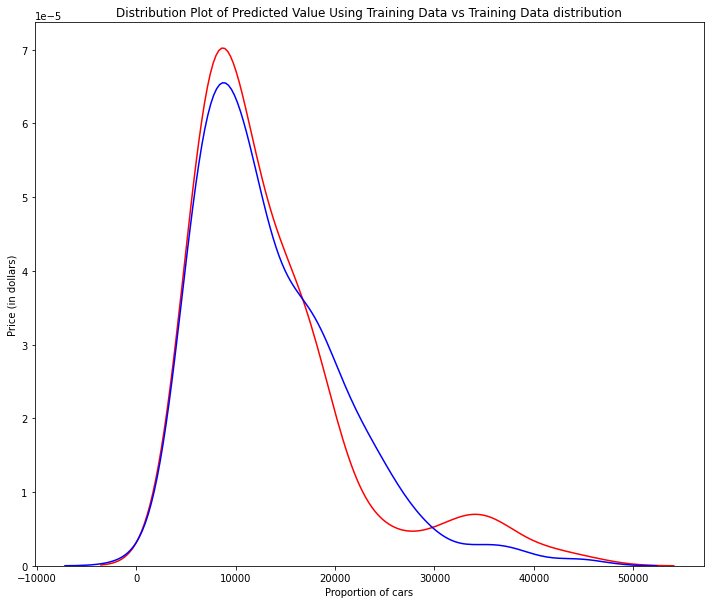

In [161]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data distribution'
DistributionPlot(y_train, yhat_train, 'Actual values (Train)', 'Predicted values (Train)', Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


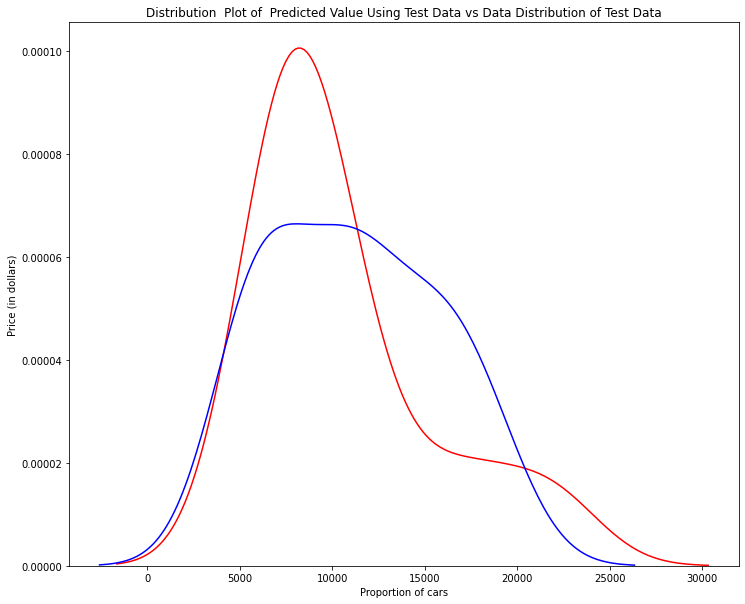

In [162]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.



In [163]:
from sklearn.preprocessing import PolynomialFeatures

**Overfitting**

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for training and the rest for testing:



In [164]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.45 , random_state=0)

In [165]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.



In [166]:
poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [167]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6727.58219945,  7306.70943225, 12213.70783901, 18895.03307984,
       19996.8349332 ])

Let's take the first five predicted values and compare it to the actual targets.



In [168]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)


Predicted values: [ 6727.58219945  7306.70943225 12213.70783901 18895.03307984]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.



In [169]:
x_train[['horsepower']].shape, x_test[['horsepower']].shape

((110, 1), (91, 1))

In [170]:
y_train.shape, y_test.shape

((110,), (91,))

In [171]:
#Pollyplot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

R^2 of the training data:



In [172]:
poly.score(x_train_pr, y_train)

0.5568527853920224

R^2 of the testing data:


In [173]:
poly.score(x_test_pr, y_test)

-29.815556299616322

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:



Text(3, 0.75, 'Maximum R^2')

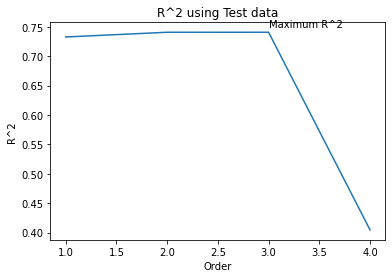

In [174]:
Rsqu_test = []

order = [1,2,3,4]
for n in order:
  pr = PolynomialFeatures(degree = n)

  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])

  lr.fit(x_train_pr,y_train)
  Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('Order')
plt.ylabel('R^2')
plt.title('R^2 using Test data')
plt.text(3, 0.75,'Maximum R^2')
 

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

The following function will be used in the next section. Please run the cell below.



In [175]:
def f(order,test_data):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data,random_state=0)
  pr= PolynomialFeatures(degree=order)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  X_test_pr = pr.fit_transform(x_train[['horsepower']])
  poly = LinearRegression()
  poly.fit(x_train_pr, y_train)
  Pollyplot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test, poly,pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.



interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>

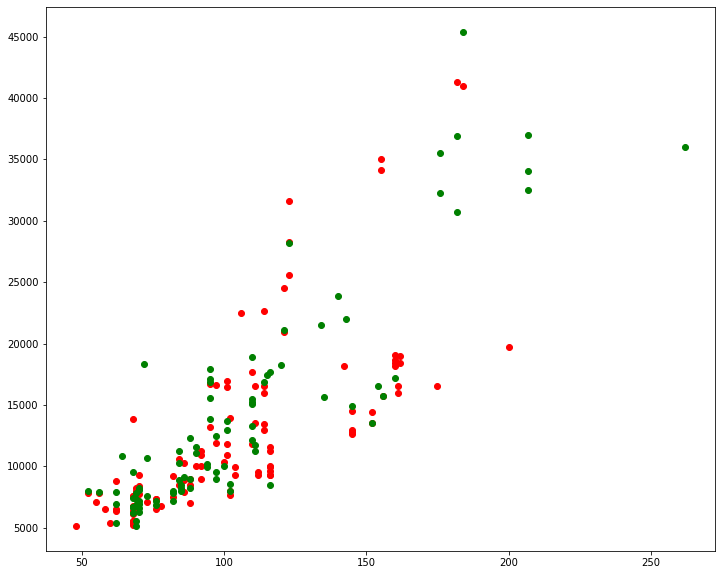

In [177]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))


In [178]:
pr1 = PolynomialFeatures(degree=2)


In [179]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


In [180]:
x_train_pr1.shape


(110, 15)

In [181]:
poly1=LinearRegression().fit(x_train_pr1,y_train)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


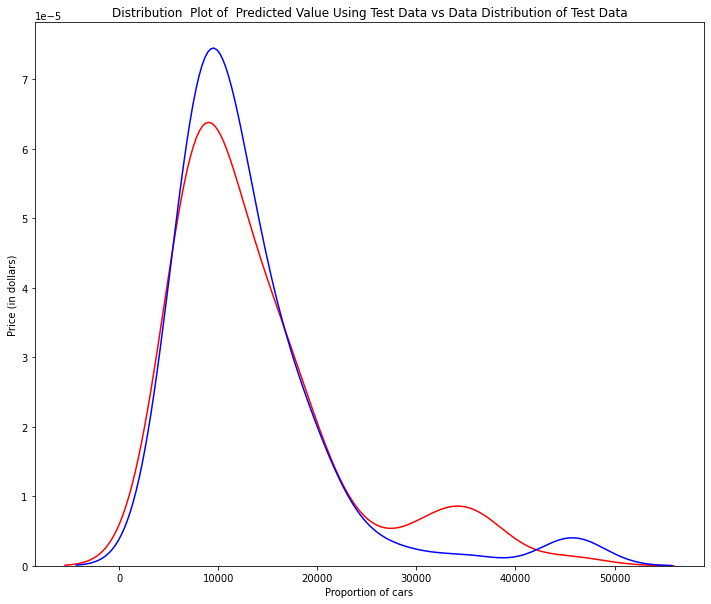

In [182]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)


**Part 3: Ridge Regression**

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


Ridge regression is a regression that is employed in a Multiple regression model when Multicollinearity occurs. Multicollinearity is when there is a strong relationship among the independent variables. Ridge regression is very common with polynomial regression. Ridge regression can be used to regularize and reduce the standard errors to avoid over-fitting a regression model.


We start with an alpha value, use it as an argument in the constructor, we train the model, make a prediction using the validation data, then calculate the R-squared and store the values.
Repeat the value for a larger value of alpha.
We train the model again, make a prediction using the validation data, then calculate the R-squared and store the values of R-squared.
We repeat the process for a different alpha value, training the model, and making a prediction.
We select the value of alpha that maximizes the R-squared.
The general syntax is


from sklearn.linear_model import Ridge


RidgeModel = Ridge(alpha = 0.1)


RidgeModel.fit(X,y)


Yhat = RidgeModel.predict(X)


Let's perform a degree two polynomial transformation on our data.



In [183]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])


Let's import Ridge from the module linear models.



In [184]:
from sklearn.linear_model import Ridge


Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1



In [185]:
RigeModel=Ridge(alpha=1)


In [186]:
RigeModel.fit(x_train_pr, y_train)


Ridge(alpha=1)

In [187]:
yhat = RigeModel.predict(x_test_pr)


In [188]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)


predicted: [ 6572.19586866  9634.40697746 20948.17104272 19403.38016094]
test set : [ 6295. 10698. 13860. 13499.]


In [189]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)


100%|██████████| 1000/1000 [00:05<00:00, 181.09it/s, Test Score=0.564, Train Score=0.859]


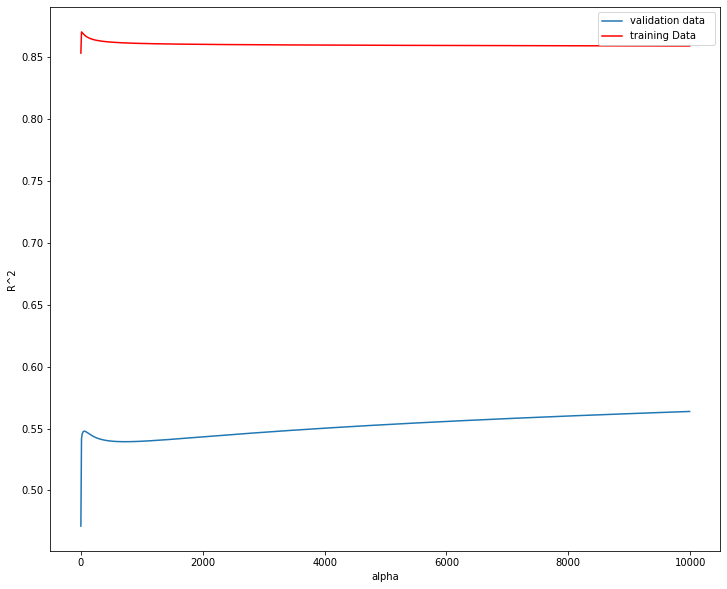

In [190]:
plt.figure(figsize=(12, 10))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


Figure 4: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.


The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data


The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.



In [191]:
RidgeModel = Ridge(alpha=10) 
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)


0.541833351867631

**Part 4: Grid Search**

The term alpha is a hyperparameter.

Grid Search allows us to scan through multiple free parameters with few lines of code. Grid Search takes the model or objects you would like to train and different values of the hyperparameters. It then calculates the mean square error or R-squared for various hyperparameter values, allowing you to choose the best values.


Let's import GridSearchCV from the module model_selection.



In [192]:
from sklearn.model_selection import GridSearchCV


In [193]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1


[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [194]:
RR=Ridge()
RR


Ridge()

In [195]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)


In [196]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [197]:
BestRR=Grid1.best_estimator_
BestRR


Ridge(alpha=10000)

In [198]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)


0.8411781387793232

In [199]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Ridge(alpha=0.1, normalize=True)